# Lab 3: Image Registration

You will find the entire lab manual in this file. Some exercises require you to write a text answer, others require you to write code. You should not define functions inside this file. Instead save functions to a functions file (`functions.py`) and call them from the code cells in this notebook.

## Submission Requirements:
Your final lab submission should include:

- Your edited **notebook file** (`.ipynb`).
- Your **`functions.py`** file containing all function definitions.
- A **HTML printout** of the executed notebook with all outputs visible: File → Save and export Notebook As → HTML

The purpose of this lab is to learn how to register two images using an affine transformation. An affine transformation is written as:


$$
\left(\begin{array}{l}
\tilde{x} \\
\tilde{y}
\end{array}\right)=\left(\begin{array}{ll}
a & b \\
c & d
\end{array}\right)\left(\begin{array}{l}
x \\
y
\end{array}\right)+\left(\begin{array}{l}
t_{x} \\
t_{y}
\end{array}\right)=A\left(\begin{array}{l}
x \\
y
\end{array}\right)+t
$$

It can also be written using homogeneous coordinates as:

$$
\left(\begin{array}{l}
\tilde{x} \\
\tilde{y} \\
1
\end{array}\right)=\left(\begin{array}{ll}
a & b & t_{x}\\
c & d & t_{y}\\
0 & 0 & 1
\end{array}\right)\left(\begin{array}{l}
x \\
y \\
1
\end{array}\right)=T\left(\begin{array}{l}
x \\
y \\
1
\end{array}\right)
$$
where $T$ is an affine transformation matrix. Apart from rotation, translation and scaling, it also allows strecthing the image in an arbitrary dimension.

### Exercise 3.1
What is the minimal number of point correspondences, $K$, required in order to estimate an affine transformation between two images?

In general, an estimation problem where the minimal of amount of measurements is used to estimate the unknown parameters is called a minimal problem.

**Answer**: We need 3 point correspondences.

### Exercise 3.2
Once you have found a proper coordinate transformation between two images, you can use the provided function `affine_warp` to warp the source image and create a warped image. Let’s try it.

Load the image `mona.png` to the variable `img`. After copying your `read_image` function from previous labs into the functions directory, try running the following code snippet. Play around with the values in A, t to see the results and understand the effect of how to rotate, translate and stretch.

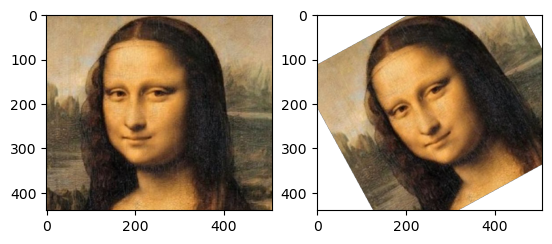

In [1]:
from supplied import affine_warp, read_image
import numpy as np
import matplotlib.pyplot as plt

img = read_image('./data/mona.png'); 

# Square transformation matrix
T = np.array([[0.88, -0.48, 100],
              [0.48, 0.88, -100],
              [0, 0, 1]])


warped = affine_warp(img, T, img.shape)

f, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(warped)
plt.show()

Change the values in $A$ and $t$ in the transformation matrix $T$ to see what happens. Swap $A$ for the identity matrix to try a pure translation. 

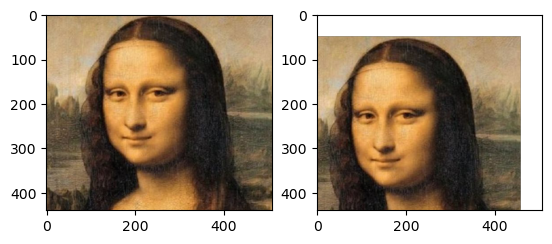

In [2]:
# Your Code here
T = np.array([[1, 0, 50],
              [0, 1, -50],
              [0, 0, 1]], dtype=np.float32)


warped = affine_warp(img, T, img.shape)

f, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(warped)
plt.show()

Lastly, if one would like to stretch the image along the x-axis, one simply applies $A$ as a diagonal matrix with some stretching factor $k$. Create a stretching matrix with a factor $k$ along a diagonal direction with an affine transformation and apply to `mona`.

Remember that `affine_warp` function takes a square transformation matrix $T$ as input.

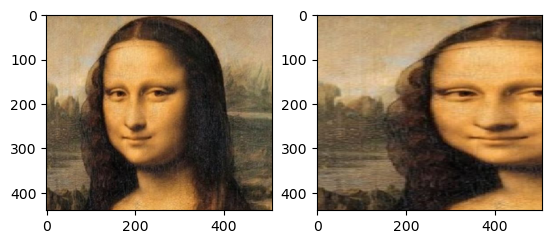

In [3]:
# Your Code here
k = 0.5
T = np.array([[k, 0, 0],
              [0, 1, 0],
              [0, 0, 1]], dtype=np.float32)


warped = affine_warp(img, T, img.shape)

f, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(warped)
plt.show()

### Exercise 3.3
For any estimation task it is a good idea to have at least one test case where you know what the answer should be. In this exercise you should make such a test case for RANSAC. Start by generating random points, `pts`, and a random transformation. Then transform these points to create a `pts_tilde`. If you want to make it more realistic, add random noise to the points. You now have two sets of points related by a known affine transformation. In the following exercises you will try to estimate this transformation. As you know the correct answer it is easy to detect if you make a mistake. 	

**Make a function**
```python
def affine_test_case(N: int):
    ...

    return pts, pts_tilde, A_true, t_true
```
that generates a test case for estimating an affine transformation. The transformation should map `pts` to `pts_tilde`. Don't add any outliers now. Outputs `pts` and `pts_tilde` should be `2xN`-arrays. Also output the true transformation, so you know what to expect from your code.

In [4]:
from functions import affine_test_case

pts, pts_tilde, A_true, t_true = affine_test_case(3)

print(f"pts shape: {pts.shape}")
print(f"pts_tilde shape: {pts_tilde.shape}")

pts shape: (2, 3)
pts_tilde shape: (2, 3)


### Exercise 3.4
Make a minimal solver for the case of affine transformation estimation. In other words, make a function

```python
def estimate_affine(pts, pts_tilde):
    ...
    return A, t
```
that estimates an affine transformation mapping `pts` to `pts_tilde`, where `pts` and `pts_tilde` are `2xK` - arrays and $K$ is at least the number you found in Ex 3.1. Try your function on points from the test case in Ex 3.3.

In [5]:
from functions import estimate_affine

pts, pts_tilde, A_true, t_true = affine_test_case(N=10)
A_est, t_est = estimate_affine(pts, pts_tilde)

print("True A:")
print(A_true)
print("Estimated A:")
print(A_est)
print("True t:")
print(t_true)
print("Estimated t:")
print(t_est)

True A:
[[ 2.84891079 -3.86496238]
 [-7.07062893 -2.30640129]]
Estimated A:
[[ 2.84891079 -3.86496238]
 [-7.07062893 -2.30640129]]
True t:
[[-0.42253033]
 [ 6.48869519]]
Estimated t:
[[-0.42253033]
 [ 6.48869519]]


### Exercise 3.5
Make a function

```python
def residual_lgths(A, t, pts, pts_tilde):
    ...
    return lgths
```
that computes the lengths of 2D residual vectors. the function should return an array with *N* values. Hint : Given a `2xN` matrix *M*, the column-wise sum of the squared elements can be computed as `np.sum(np.pow(M, 2), axis=0)`. 

### Exercise 3.6
Modify your function `affine_test_case` to create a new function `affine_test_case_outlier` that takes parameters `outlier_rate`, `n_samples`, `image_height` and `image_width` and produces a percentage of outliers among the output points. For example, the outliers could be spread randomly over the image, or always shifted with a small translation.

```python
def affine_test_case_outlier(outlier_rate, n_samples, image_height, image_weight):
    ...

    return pts, pts_tilde, A_true, t_true, outlier_idxs
```
The function should also return the `outlier_idxs`, the indexes (as a boolean array) of the points that are outliers.

In [6]:
from functions import affine_test_case_outlier

outlier_rate = 0.1
n_samples = 10
image_height = 400
image_width = 400
pts, pts_tilde, A_true, t_true, outlier_idxs = affine_test_case_outlier(outlier_rate, 
                                                          n_samples=10, 
                                                          image_height=image_height, 
                                                          image_width=image_width)

We can visualize the difference between outliers and inliers. In the following plot, the green box marks the original "image", and the green rings the original, non-transformed points.

Inlier points (generated with $A\boldsymbol{x}+t$, green) will transform similarly. Outlier points (generated randomly, red) will not transform similarly to the inlier points. Ideally, we wish to estimate the transformation based on the inlier points only.

Try varying the outlier ratio to better understand the difference between points.

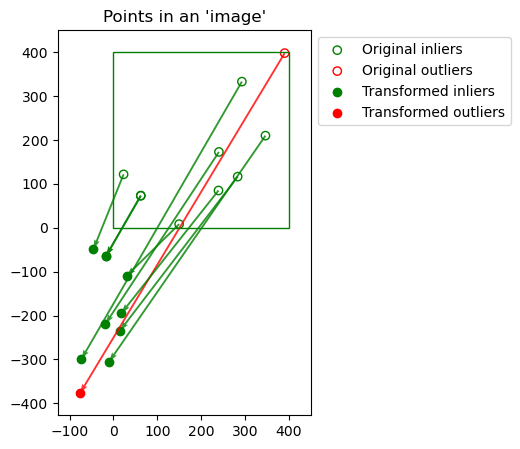

In [7]:
from visualization import plot_affine_test_case_outlier

f, ax = plot_affine_test_case_outlier(pts, pts_tilde, image_width, image_height, outlier_idxs)
plt.show()

### Exercise 3.7
A naïve estimation of the transformation from `pts` to `pts_tilde` would be influenced by the outlier points. RANSAC is a method used to reject outliers and recover the underlying affine transformation from the inlier correspondences.

**Make a function**
```python
def ransace_fit_affine(pts: np.ndarray, pts_tilde: np.ndarray, threshold: float, n_iter: int = 10000, max_inliers: int = 0) -> Tuple[np.ndarray, np.ndarray]: 
    ...
    return A, t
```
that uses RANSAC to find an affine transformation between two sets of points. (Like before the transformation should map `pts` onto `pts_tilde`.) Test your function on test cases generated with your function `affine_test_case_outlier`. Try different outlier rates and RANSAC thresholds. Make sure that you get the right transformation and a reasonable number of outliers. 


In [8]:
from functions import affine_test_case_outlier, ransac_fit_affine

outlier_rate = 0.3
thresh = 0.05
image_height = 400
image_width = 400
pts, pts_tilde, A_true, t_true, outlier_idxs = affine_test_case_outlier(outlier_rate, 
                                                          n_samples=10, 
                                                          image_height=image_height, 
                                                          image_width=image_width)

A_est, t_est = ransac_fit_affine(pts, pts_tilde, thresh=thresh)

pts_est = A_est @ pts + t_est
print("True A:")
print(A_true)
print("Estimated A:")
print(A_est)
print("True t:")
print(t_true)
print("Estimated t:")
print(t_est)

True A:
[[ 0.22370579 -0.4157107 ]
 [-0.72101228 -0.26727631]]
Estimated A:
[[ 0.22370579 -0.4157107 ]
 [-0.72101228 -0.26727631]]
True t:
[[-0.08786003]
 [ 0.57035192]]
Estimated t:
[[-0.08786003]
 [ 0.57035192]]


Explain your observations with different values of threshold. Why do arbitrarily small values of threshold work in this case?

**Answer:** We first set the outlier rate lower than 0.5. When testing different threshold values with other parameters fixed, we observed that with large thresholds, both inliers and outliers could be classified as inliers, which made the model inaccurate. As the threshold decreased, outliers were gradually excluded, and the model became more robust and accurate.

Then we set the outlier rate higher than 0.5. We found that the model tended to fit the outliers. However, this is explainable. The reason is that we generate outliers by simply translating them all in the same way, meaning the outliers follow a structured pattern. As a result, when the number of outliers is larger than the number of inliers, these structured outliers become inliers.

However, in the real world, outliers are unstructured and do not follow any clear pattern. Therefore, their residuals are usually much larger than those of the true inliers. Therefore, when the threshold becomes small, these outliers will be excluded.


We visualize the estimated transformation. Inlier points (green) should be estimated correctly (green crosses), while the impact of the outlier points (red) should be disregarded.

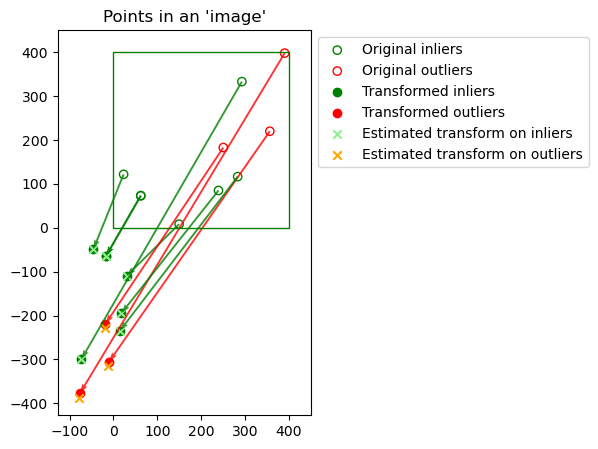

In [9]:
from visualization import plot_affine_test_case_outlier_with_est

f, ax = plot_affine_test_case_outlier_with_est(pts, pts_tilde, pts_est, image_width, image_height, outlier_idxs)
plt.show()

### Exercise 3.8
For this exercise, we will estimate the transformation matrix between two images. We will use SIFT to extract features from images in a source image at `source_path`, and a target image at `target_path`. However, to estimate the matrix (e.g. using RANSAC), we need point *correspondences*, that is *matched* points between the source and target. 

As such, we will use the supplied functions `extract_sift_features` and `match_descriptors` to find good points and match them between the images. Use these points to estimate the transformation using your `ransac_fit_affine` function.

The image will then be warped using the supplied `affine_warp` function, which takes the source image, the affine transformation matrix, and the target image size as input.

**Make a function**
```python
def align_images(source: np.ndarray, target: np.ndarray, thresh: float = 10, plot: bool = True):
    ...
    return warped
```
where `thresh` is the threshold for the outliers in the `ransac_fit_affine` function, and `plot` is a boolean argument to plot the correspondences. You can use the function `plot_matches` in `visualization.py` for this (not compulsory).

These functions use the OpenCV library for SIFT and RANSAC, and requires images to be in `uint8`(0-255) format. As such, please use the supplied `read_as_grayscale` function to ensure compatibility.

### Exercise 3.9
Align `vermeer_source.png` to `vermeer_target.png`. 

In [10]:
from functions import align_images
from supplied import read_as_grayscale

source = read_as_grayscale('./data/vermeer_source.png')
target = read_as_grayscale('./data/vermeer_target.png')

warped  = align_images(source, target, thresh=0.1, plot=True)

f, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(source, cmap='gray')
ax[0].set_title('Source Image')
ax[1].imshow(target, cmap='gray')
ax[1].set_title('Target Image')
ax[2].imshow(warped, cmap='gray')
ax[2].set_title('Aligned Image')

plt.show()



ImportError: cannot import name 'align_images' from 'functions' (/Users/noodles/Documents/document/cth/assignments/SSY098-Image Ananlysis/lab_3/functions.py)

### Exercise 3.10
Try aligning the images `CT_1.jpg` and `CT_2.jpg`. Although SIFT is designed to be robust to changes in illumination and contrast, in practice, strong differences in intensity distributions can still affect keypoint detection and matching quality. Therefore, we will apply histogram equalization as a pre-processing step to improve contrast and make features more distinguishable.

In [ ]:
from supplied import read_as_grayscale
import cv2 as cv

source = read_as_grayscale('./data/CT_1.jpg')
target = read_as_grayscale('./data/CT_2.jpg')

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
source = clahe.apply(source)
target = clahe.apply(target)

# Align the images using the function you implemented
warped  = align_images(source, target, thresh=200)

f, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(source, cmap='gray')
ax[0].set_title("Source image")
ax[1].imshow(target, cmap='gray')
ax[1].set_title("Target image")
ax[2].imshow(warped, cmap='gray')
ax[2].set_title("Warped image")

plt.show()

# Plot target image in the warped image, using the same coordinates
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(target, cmap='gray')
ax.imshow(warped, cmap='jet', alpha=0.2)
ax.set_title("Target image warped to source image")
ax.axis('off')

plt.show()

Try varying the threshold for the inliers. What values are required to properly register the image? What are possible reasons for this?

**Answer**: 

### Exercise 3.11
Try aligning `tissue_fluorescent.tif` and `tissue_brightfield.tif`. 

Sometimes, some pre-processing is required. In the fluorescent image, the intensities are basically inverted, so you need to invert one of the images before computing descriptors. (Otherwise you will not get any good matches.) 

You may also find it helpful to do some pre-preprocessing of the image intensities.

In [ ]:
import cv2 as cv
from supplied import read_as_grayscale

source = read_as_grayscale('./data/tissue_brightfield.tif')
target = read_as_grayscale('./data/tissue_fluorescent.tif')

source = 255 - source

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
source = clahe.apply(source)
target = clahe.apply(target)

warped = align_images(source, target, thresh=100, plot=True)

f, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(source, cmap='gray')
ax[0].set_title("Source image")
ax[1].imshow(target, cmap='gray')
ax[1].set_title("Target image")
ax[2].imshow(warped, cmap='gray')
ax[2].set_title("Warped image")

plt.show()

# Plot target image in the warped image, using the same coordinates
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(target, cmap='gray')
ax.imshow(warped, cmap='jet', alpha=0.2)
ax.set_title("Target image warped to source image")
ax.axis('off')

plt.show()

### Exercise 3.12
Sometimes it is beneficial to make a final correction of the RANSAC estimate, using all estimated inliers.

**Make a function**
```python
def ransac_fit_affine_ls(pts, pts_tilde, thresh, n_iter, max_inliers = 0) -> Tuple[np.ndarray, np.ndarray]:
    ...
    return A, t
```
by modifying your original `ransac_fit_affine` function to estimate an affine transformation mapping `pts` to `pts_tilde` in least squares sense, i.e., all inlier points in `pts` and `pts_tilde` are used to compute the transformation. 

### Exercise 3.13
**Make a function**
```python
def align_images_inlier_ls(
        source: np.ndarray, 
        target: np.ndarray, 
        thresh: float = 10, 
        plot: bool=False) -> np.ndarray:
    ...
    return warped
```
that uses your new `ransac_fit_affine_ls`.

### Exercise 3.14
Align `vermeer_source.png` to `vermeer_target.png` using `align_images_inliers_ls`.

In [ ]:
from functions import align_images_inlier_ls
from supplied import read_as_grayscale

source = read_as_grayscale('./data/vermeer_source.png')
target = read_as_grayscale('./data/vermeer_target.png')

warped  = align_images_inlier_ls(source, target, thresh=0.1, plot=True)

f, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(source, cmap='gray')
ax[0].set_title('Source Image')
ax[1].imshow(target, cmap='gray')
ax[1].set_title('Target Image')
ax[2].imshow(warped, cmap='gray')
ax[2].set_title('Aligned Image')

plt.show()


Do you notice an improvement?

**Answer**:

## Warping
### Exercise 3.15
So far, you have used the OpenCV functions for warping the images, and we have not had to consider the mechanisms of actually reconstructing the image and its pixels given the transformation matrix.

The algorithm for backwards warping to the original image can intuitively be written 

```
for each pixel (x',y') in the transformed image:
    1. Compute the inverse pixel coordinates (x, y)
    2. Resample the source image intensities at (x, y)
```

It is fairly difficult to write a fast implementation for warping, but you will do so anyway. However, we will only use it for small images.

You will first create a simple sampling function (step 2 in the algorithm) using neareast neighbours. 

**Make a function**
```python
def sample_image_at(image, position):

    return value
```
that gives you the pixel value at position. If the elements of position are not integers, select the value at the closest pixel. If it is outside the image, return 255 (i.e. white). 

Try the function on the transformed image `source_16x16.tif` to make sure it works.

In [ ]:
from functions import sample_image_at

image = read_as_grayscale('./data/source_16x16.tif')
value = sample_image_at(image, (4,5))
print(value)

plt.imshow(image, cmap='gray')

### Exercise 3.16
Now, you will make a warping function that warps a 16 x 16 image according to the coordinate transfomation provided in the supplied function `transform_coordinates`

**Make a function**
```python
def warp_16x16(source):

    return warped
```
that warps source according to the function `transform_coordinates` and forms an output 16 x 16 image warped. 

`transform_coordinates` defines the coordinate transformation from target to source, that is, it takes a 2-vector `target_pos` as input, and maps it to the source image. 

In your function, loop over all target pixels and use the coordinate transformation along with your function `sample_image_at` to extract pixel values from the source image. Try the function on `source_16x16.tif`. You will know if you get it right.  

In [ ]:
from functions import warp_16x16

image = read_as_grayscale('./data/source_16x16.tif')
warped = warp_16x16(image)

plt.imshow(warped, cmap='gray')